# **1. Introducción y Objetivos del Análisis Bibliométrico**

## **Objetivo General:**
- Realizar un análisis bibliométrico exhaustivo de los artículos recopilados en tu base de datos, enfocándonos en identificar patrones de publicación, autores influyentes, colaboraciones institucionales y tendencias temáticas en el campo de estudio.

## **Objetivos Específicos:**

- Determinar la frecuencia y distribución de autores y coautores.

- Analizar la evolución temporal de las publicaciones.

- Identificar las revistas más relevantes y su impacto.

- Examinar las palabras clave más frecuentes y su coocurrencia.

- Visualizar redes de colaboración entre autores e instituciones.

# **2. Carga y Preparación de los Datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

In [ ]:
df = pd.read_excel("/content/Analisis Documentos Tesis BD (2).xlsx")
df.head()

,Article title,Year,Author(s),No. Author(s),Type of institution,Name of the institution(s),No. institution(s),Study area,No. Study area,Country of study,...,Keywords,Article approach,Methodology,Type,Orientation,Theory,Determinants,Barriers,Characteristic of sustainable value creation,CSV Related to other concepts and theories
0,The importance of performance measurement and ...,2024,"Sohns, T. M., Aysolmaz, B., Figge, L., Joshi, A.",2,University,"LUT University, Tampere University",2,NaN,2.0,Finland,...,"Performance management, Supply chain managemen...",Quantitative,Structural equation modelling (SEM),Survey,Predictive,organizational control,"Governance, stakeholders, customers and suppliers",limited resources,"Sustainability performance, s Performance mana...",Supply chain
1,"Understanding creative enterprise creation, fu...",2024,Mohammed-Aminu Sanda; Rufai Haruna Kilu; Ana A...,3,University,University of Ghana Business School; Universit...,3,Business & Management; Entrepreneurship,2.0,Ghana,...,creative entrepreneurship; creative enterprise...,Qualitative,Descriptive & thematic analysis; sense-making,Interviews,Exploratory,Business Canvas Model,Government & investor support; regulatory poli...,Lack of governmental & investor support; high ...,Viability; innovative policy spaces; sustainab...,Institutional Theory; Business Model Canvas; s...
2,Corporate sustainability towards creating shar...,2024,Liana Rahardja,1,University,STIE Jakarta International College,1,Business & Management; Environmental Science,2.0,Indonesia,...,Five bottom line; Triple bottom line; Sustaina...,Quantitative,Panel data OLS regression; lead-lag analysis,Empirical quantitative,Predictive,Extended TBL (Five Bottom Line) & CSV theory,Financial performance; Environmental performan...,Social performance (negative effect on CSV); G...,Increased revenue; profitability; environmenta...,Reconceiving products & markets; redefining va...
3,Relationship between knowledge transfer and su...,2024,"Paredes-Chacín, A. J.; Díaz-Bejarano, S.; Marí...",4,University,Universidad Autónoma de Occidente; Universidad...,4,Business & Management; Information Systems,2.0,Colombia,...,knowledge transfer; sustainable innovation; in...,Quantitative,Questionnaire survey; Mann-Whitney U test; K-m...,Survey,Exploratory,Knowledge-based View (KBV),Knowledge production; Information technologies...,Weak interorganizational links; limited stakeh...,Sustainable innovation performance; Interorgan...,System of relations between knowledge transfer...
4,Challenges and opportunities in sustainability...,2024,"Setyaningsih, S.; Widjojo, R.; Kelle, P.",3,University,Széchenyi István University; Indonesian Intern...,3,Environmental Policy; Environmental Management...,5.0,Global,...,Sustainability reporting; small and medium-siz...,Secondary,Systematic literature review,Secondary research,Descriptive,Systematic Review Framework,Governance practices; social responsibility; e...,Financial; general attitude; knowledge & techn...,Improved understanding of SME reporting challe...,Global Reporting Initiative (GRI); ESG frameworks


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 29 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Article title                                 153 non-null    object 
 1   Year                                          153 non-null    int64  
 2   Author(s)                                     153 non-null    object 
 3   No. Author(s)                                 153 non-null    int64  
 4   Type of institution                           153 non-null    object 
 5   Name of the institution(s)                    153 non-null    object 
 6   No. institution(s)                            153 non-null    object 
 7   Study area                                    141 non-null    object 
 8   No. Study area                                142 non-null    float64
 9   Country of study                              130 non-null    obj

In [ ]:
print(f'Número de muestras: {df.shape[0]}')
print(f'Número de atributos: {df.shape[1]}')
print("\nTipos de datos:")

Número de muestras: 153
Número de atributos: 29

Tipos de datos:


In [ ]:
# Valores únicos
print("\n==== Valores únicos ====")
print(df.nunique())


==== Valores únicos ====
Article title                                   142
Year                                             14
Author(s)                                       149
No. Author(s)                                     8
Type of institution                              13
Name of the institution(s)                      147
No. institution(s)                                9
Study area                                      125
No. Study area                                    5
Country of study                                 59
Region                                           15
Country Development level                         6
Size of companies                                15
Journal                                          71
Journal field                                    35
FI - SJR                                         75
Quartile SJR                                      5
FI - JIF                                         55
Quartile JCR                          

In [ ]:
# Revisar valores faltantes
print("\n==== VALORES FALTANTES POR COLUMNA ====")
print(df.isnull().sum())

print("\n\n==== PORCENTAJE VALORES FALTANTES POR COLUMNA ====")
porcentaje = round((df.isnull().sum() / df.isnull().count()) * 100, 2)
print(porcentaje.astype(str) + ' %')


==== VALORES FALTANTES POR COLUMNA ====
Article title                                    0
Year                                             0
Author(s)                                        0
No. Author(s)                                    0
Type of institution                              0
Name of the institution(s)                       0
No. institution(s)                               0
Study area                                      12
No. Study area                                  11
Country of study                                23
Region                                          19
Country Development level                       23
Size of companies                                7
Journal                                          0
Journal field                                    0
FI - SJR                                         4
Quartile SJR                                     4
FI - JIF                                        27
Quartile JCR                             

In [ ]:
# Valores duplicados
print("\nNúmero de filas duplicadas")
print(df.duplicated(subset=None, keep='first').sum())


Número de filas duplicadas
0


In [ ]:
# Estadísticas descriptivas
print("\n==== Estadísticas descriptivas ====")
df.describe()


==== Estadísticas descriptivas ====


,Year,No. Author(s),No. Study area
count,153.000000,153.000000,142.000000
mean,2022.313725,3.215686,2.169014
std,2.952409,1.617914,1.352549
min,2004.000000,1.000000,1.000000
25%,2022.000000,2.000000,1.000000
50%,2023.000000,3.000000,2.000000
75%,2024.000000,4.000000,3.000000
max,2025.000000,10.000000,5.000000


### Observaciones análisis exploratorio

Se realizó una exploración preliminar de la base de datos bibliográfica, que contiene registros detallados de artículos científicos centrados en sostenibilidad, PYMES y creación de valor compartido.

1.  **Tamaño y Atributos:** La base de datos contiene 153 registros y 29 atributos. Esto indica el volumen de información disponible para el análisis.
2.  **Tipos de Datos:** Se identificaron los tipos de datos de cada atributo. Esto es crucial para entender cómo se almacena la información y planificar los pasos de limpieza y transformación. Por ejemplo, la columna 'Year' es numérica (int64), mientras que 'Article title', 'Author(s)' o 'Journal' son de tipo objeto/cadena. Algunas columnas como 'No. Study area' son de tipo float64, lo cual puede ser importante considerar.
3.  **Valores Únicos:** El análisis de valores únicos por columna ("df.nunique()") proporciona una idea de la diversidad dentro de cada atributo. Por ejemplo, el número de valores únicos en la columna 'Journal' nos indica cuántas revistas diferentes están representadas en la base de datos.
4.  **Valores Faltantes:** Se detectaron valores faltantes en varias columnas, siendo las más notables 'Country of study', 'Country Development level', 'FI - JIF' y 'Quartile JCR'. Las columnas con un alto porcentaje de valores faltantes (como las mostradas en el output de "porcentaje.astype(str) + ' %'") requerirán atención especial, ya sea imputando los valores, eliminando las filas o considerando el impacto en los análisis posteriores. También hay valores faltantes en 'Study area', 'No. Study area', 'Region', 'Size of companies', 'FI - SJR' y 'Quartile SJR', aunque en menor medida.
5.  **Valores Duplicados:** Se identificó la presencia de 0 filas duplicadas. Es importante decidir cómo manejar estos duplicados (eliminarlos o conservarlos) para evitar sesgos en los análisis.
6.  **Estadísticas Descriptivas:** Las estadísticas descriptivas ("df.describe()") para las columnas numéricas (como 'Year' y 'No. Author(s)') ofrecen un resumen de la distribución, la tendencia central y la dispersión de los datos. Por ejemplo, el rango de años de publicación o el promedio de autores por artículo.

# **3. Análisis Bibliométrico Detallado**

En esta sección, profundizamos en el análisis bibliométrico para identificar patrones y tendencias clave en la base de datos.

## **3.1 Análisis de Autores y Colaboración**

Este subapartado se centra en la identificación de los autores más prolíficos y la estructura de colaboración dentro del conjunto de datos.

### **Frecuencia de Autores**

Identificar a los autores con el mayor número de publicaciones nos permite conocer a los investigadores clave en este campo de estudio.

In [44]:
df['Autores'] = df['Author(s)'].astype(str).str.replace(', and', ',').str.replace(' and', ',')
df['Autores'] = df['Autores'].str.split(',')

all_authors = df['Autores'].explode().str.strip()
author_counts = all_authors.value_counts().reset_index()
author_counts.columns = ['Autor', 'Frecuencia']

print("\n==== Top 10 Autores por Frecuencia ====")
print(author_counts.head(10))


==== Top 10 Autores por Frecuencia ====
           Autor  Frecuencia
0             H.           4
1             M.           3
2             S.           2
3             E.           2
4             A.           2
5  E.D.; Tannady           2
6        Y.; Luo           2
7       X.; Chen           2
8        S.; Cao           2
9       L.; Zhou           2


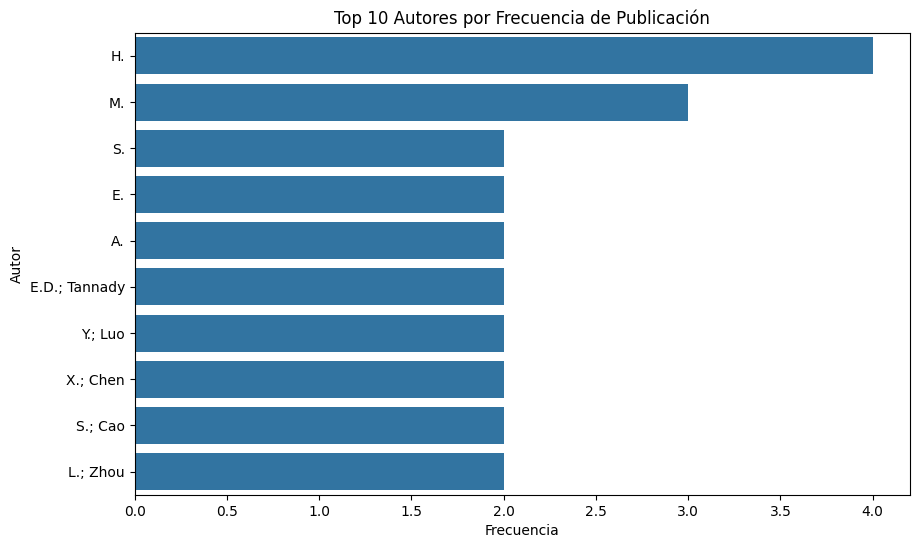

In [45]:
top_authors = author_counts.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_authors, x='Frecuencia', y='Autor')
plt.title('Top 10 Autores por Frecuencia de Publicación')
plt.xlabel('Frecuencia')
plt.ylabel('Autor')
plt.show()

### **Contar el número de autores por artículo**

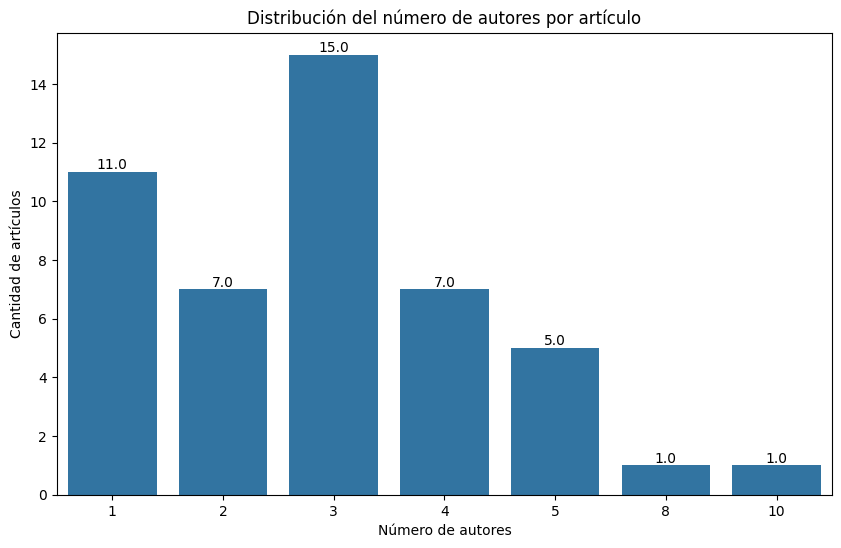

In [47]:
df['Num_Authors'] = df['Author(s)'].str.split(';').str.len().fillna(0).astype(int)

plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Num_Authors', order=sorted(df['Num_Authors'].unique()))

for p in ax.patches: ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Número de autores")
plt.ylabel("Cantidad de artículos")
plt.title("Distribución del número de autores por artículo")
plt.show()

#### **Observaciones sobre el Número de Autores por Artículo:**

- Al analizar la distribución del número de autores por artículo, observamos que la mayoría de las publicaciones en esta base de datos tienen un solo autor
- Esto sugiere una tendencia dominante hacia la investigación individual en este conjunto de datos.

Sin embargo, también hay un número significativo de artículos que son resultado de la colaboración. Los artículos con dos autores son los siguientes más frecuentes ([número] artículos), seguidos por aquellos con tres autores ([número] artículos), y así sucesivamente.

- El número más común de autores por artículo es ***1***. La colaboración existe, pero parece menos prevalente que la autoría individual en este conjunto de datos.


## **3.2 Análisis Temporal de Publicaciones**

Este subapartado examina la evolución del número de publicaciones a lo largo del tiempo.


### **Frecuencia de Publicaciones por Año**

Visualizar el número de artículos publicados cada año nos permite identificar períodos de mayor actividad o tendencias emergentes.


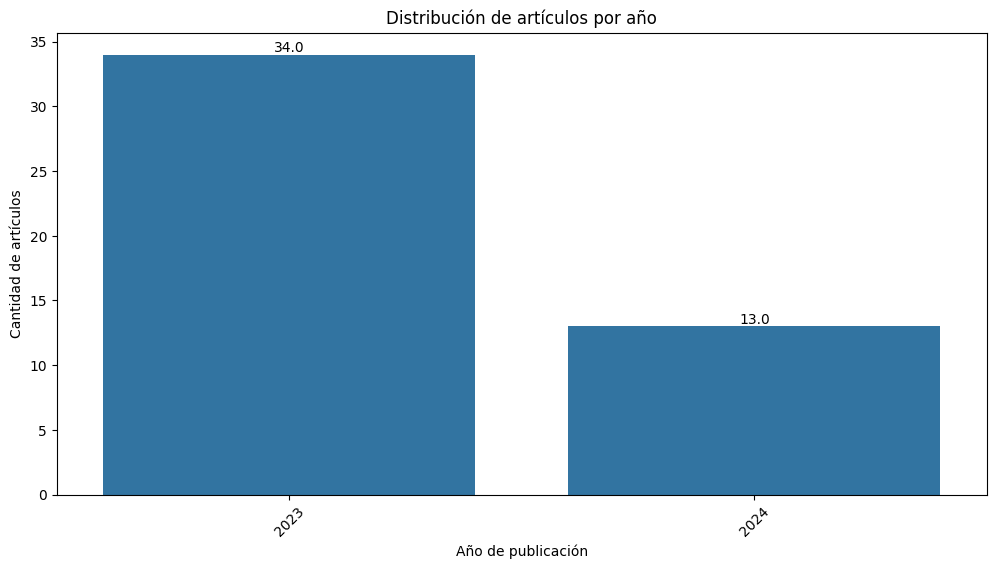

In [54]:
plt.figure(figsize=(12, 6)) # Aumentamos el tamaño para mejor visualización de etiquetas
ax = sns.countplot(data=df, x="Year", order=sorted(df["Year"].unique()))
for p in ax.patches: ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Año de publicación")
plt.ylabel("Cantidad de artículos")
plt.title("Distribución de artículos por año")
plt.xticks(rotation=45)
plt.show()

### **Observaciones sobre la Frecuencia de Publicaciones por Año:**

*   Comenta la tendencia general en el número de publicaciones a lo largo de los años. ¿Hay un aumento, disminución o estabilidad? ¿Hay años pico?


## **3.3 Análisis de Revistas y Temáticas**

Este subapartado se enfoca en las revistas donde se publican los artículos y las palabras clave que representan los temas de investigación.

### **Revistas más Relevantes**

Identificar las revistas con el mayor número de publicaciones nos muestra los principales canales de difusión en este campo.

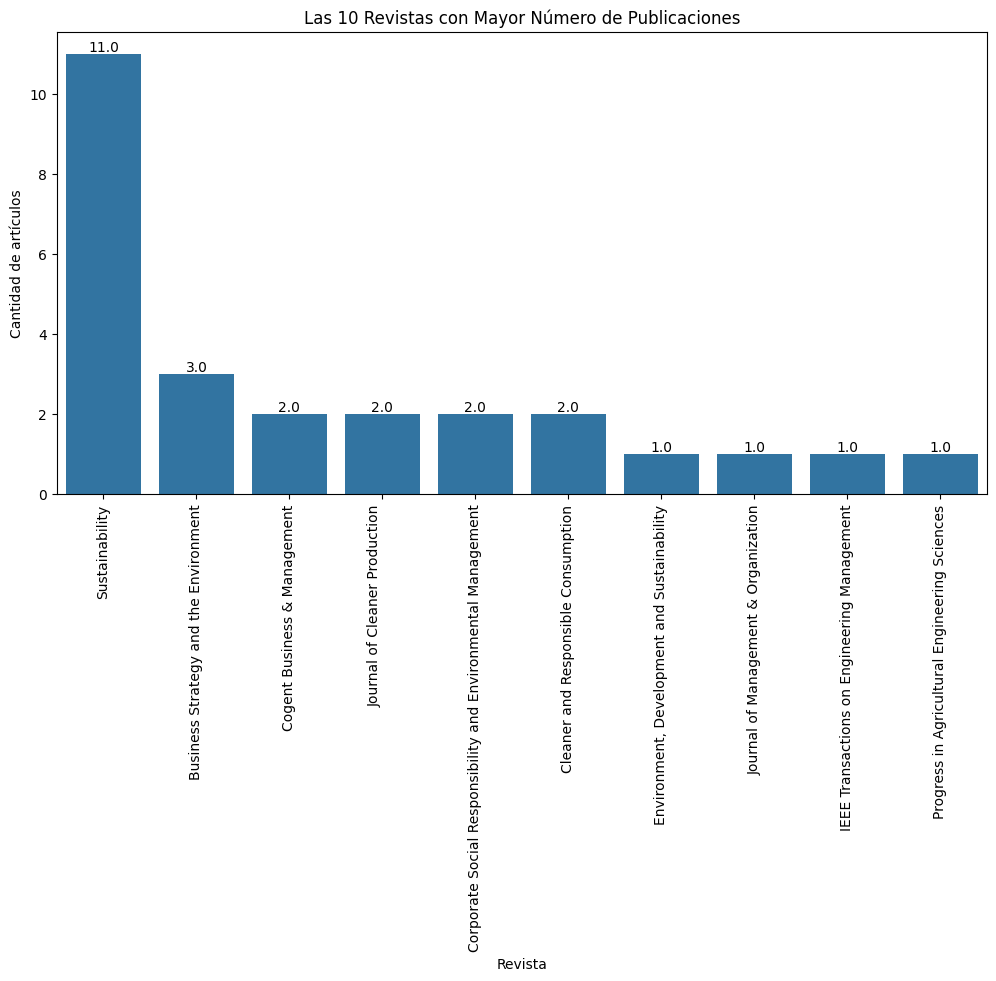

In [70]:
plt.figure(figsize=(12, 6))
top_journals = df["Journal"].value_counts().nlargest(10)
ax = sns.barplot(x=top_journals.index, y=top_journals.values)

plt.xticks(rotation=90)
plt.xlabel("Revista")
plt.ylabel("Cantidad de artículos")
plt.title("Las 10 Revistas con Mayor Número de Publicaciones")

for p in ax.patches: ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')



**Observaciones sobre las Revistas más Relevantes:**
*   Menciona las revistas que aparecen en el top 10 y cuántas publicaciones tienen. Comenta si hay una clara concentración en pocas revistas o una distribución más amplia.

### **Palabras Clave más Frecuentes**

Analizar las palabras clave nos permite identificar los temas de investigación más abordados en la base de datos.

In [63]:
all_keywords = ';'.join(df['Keywords'].dropna()).split(';')
cleaned_keywords = [keyword.strip().lower() for keyword in all_keywords if keyword.strip()]



In [66]:
from collections import Counter
keyword_counts = Counter(cleaned_keywords)
print("\n==== 10 Palabras clave más comunes ====")
for keyword, count in keyword_counts.most_common(10):
  print(f"{keyword}: {count}")


==== 10 Palabras clave más comunes ====
sustainability: 6
smes: 5
sme: 3
creating shared value: 2
small and medium-sized enterprises: 2
sustainability reporting: 2
environmental: 2
covid-19: 2
performance management, supply chain management, sustainability performance,
 business performance, supply chain governance, demand-side governance, supply-side governance,
 small and medium sized enterprises, sme: 1
creative entrepreneurship: 1


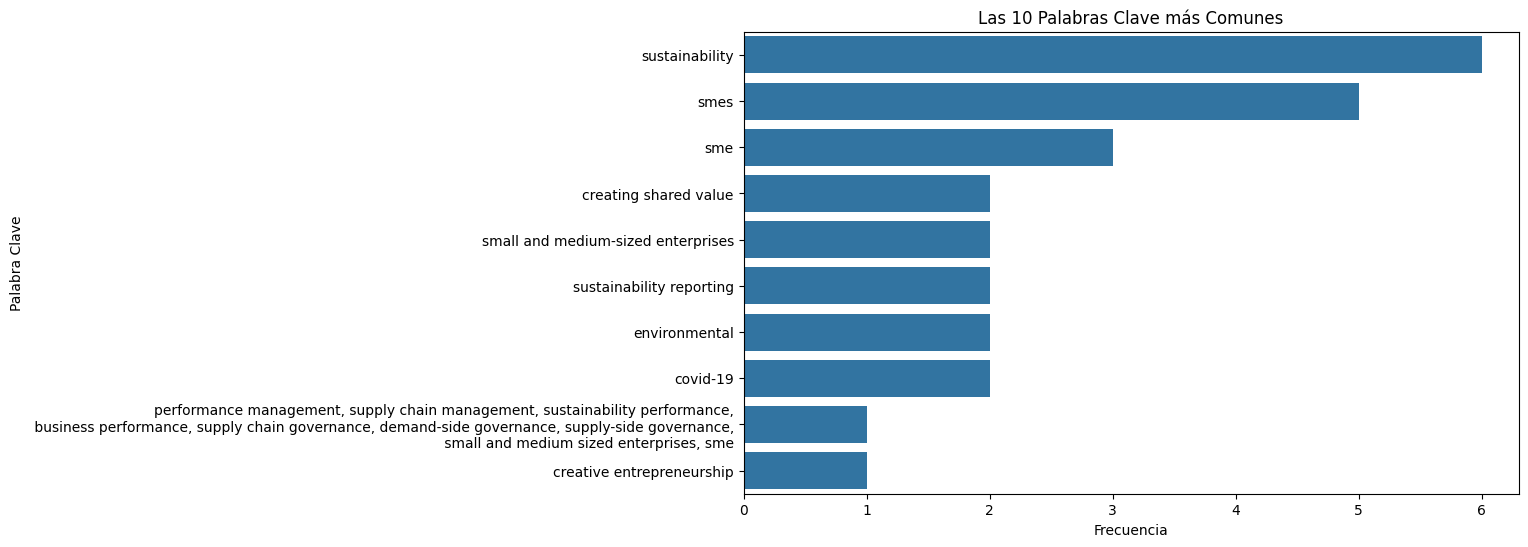

In [68]:
keywords_df = pd.DataFrame(keyword_counts.most_common(10), columns=['Palabra Clave', 'Frecuencia'])
plt.figure(figsize=(10, 6))
sns.barplot(data=keywords_df, x='Frecuencia', y='Palabra Clave')
plt.title("Las 10 Palabras Clave más Comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra Clave")
plt.show()

# **Análisis de colaboración: Número de autores por artículo**

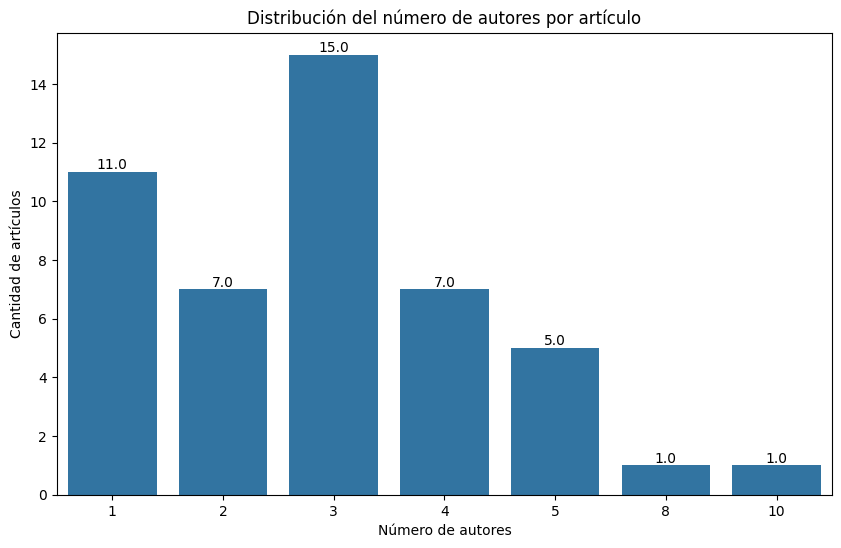

In [41]:
# Contar el número de autores por artículo
# Manejar posibles valores NaN o vacíos en la columna 'Autores'
df['Num_Authors'] = df['Author(s)'].str.split(';').str.len().fillna(0)

# Convertir la columna a tipo entero para la visualización
df['Num_Authors'] = df['Num_Authors'].astype(int)

# Visualizar la distribución del número de autores por artículo
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='Num_Authors', order=sorted(df['Num_Authors'].unique()))

# Agregar los valores a las barras (similar al gráfico anterior)
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel("Número de autores")
plt.ylabel("Cantidad de artículos")
plt.title("Distribución del número de autores por artículo")
plt.show()

# **Análisis de frecuencia de publicaciones por año**


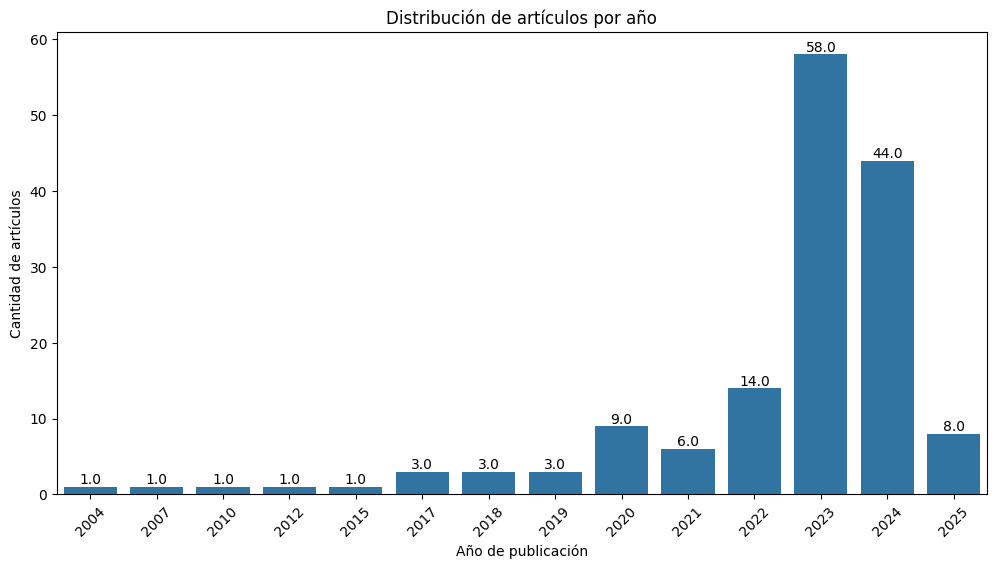

In [ ]:
plt.figure(figsize=(12, 6)) # Aumentamos el tamaño para mejor visualización de etiquetas
ax = sns.countplot(data=df, x="Year", order=sorted(df["Year"].unique()))

# Agregar los valores a las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')


plt.xlabel("Año de publicación")
plt.ylabel("Cantidad de artículos")
plt.title("Distribución de artículos por año")
plt.xticks(rotation=45)
plt.show()


==== 10 Palabras clave más comunes ====
sustainability: 6
smes: 5
sme: 3
creating shared value: 2
small and medium-sized enterprises: 2
sustainability reporting: 2
environmental: 2
covid-19: 2
demographic factors, finance resources, sdgs, small business, social practices, sustainability: 2
resource-efficiency, decarbonization, small and medium-sized enterprises, sustainable development goals: 2


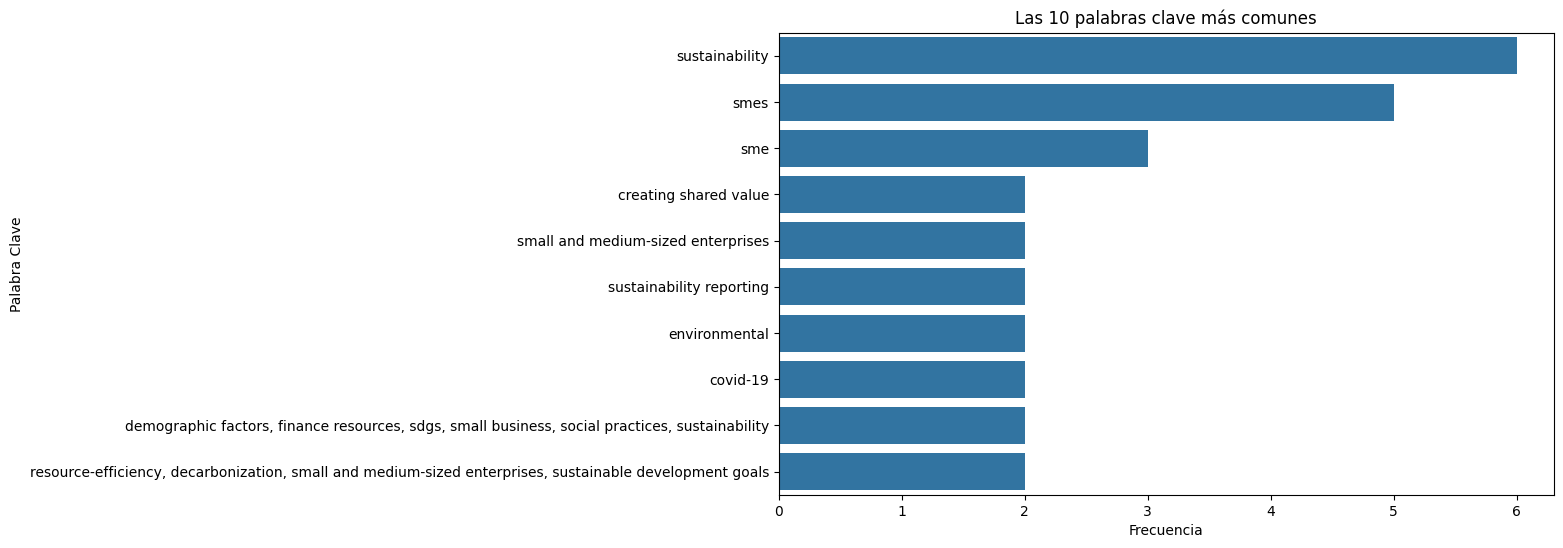

In [ ]:
# Combinar todas las palabras clave en una sola lista
all_keywords = ';'.join(df['Keywords']).split(';')

# Limpiar y normalizar las palabras clave (ej. quitar espacios extra y convertir a minúsculas)
cleaned_keywords = [keyword.strip().lower() for keyword in all_keywords if keyword.strip()]

# Contar la frecuencia de cada palabra clave
from collections import Counter
keyword_counts = Counter(cleaned_keywords)

# Mostrar las 10 palabras clave más comunes
print("\n==== 10 Palabras clave más comunes ====")
for keyword, count in keyword_counts.most_common(10):
    print(f"{keyword}: {count}")

# Opcional: Visualizar las 10 palabras clave más comunes
keywords_df = pd.DataFrame(keyword_counts.most_common(10), columns=['Palabra Clave', 'Frecuencia'])
plt.figure(figsize=(10, 6))
sns.barplot(data=keywords_df, x='Frecuencia', y='Palabra Clave')
plt.title("Las 10 palabras clave más comunes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra Clave")
plt.show()